In [30]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [4]:
file_path = "Iris.csv"
df = pd.read_csv(file_path)

In [6]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
df.shape

(150, 6)

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
# Drop the 'Id' column if present
df = df.drop(columns=['Id'], errors='ignore')

In [18]:
# Splitting dataset into features and labels
X = df.iloc[:, [0, 1]].values  # Selecting only two features
y = df.iloc[:, -1].astype('category').cat.codes  # Encode labels as numbers

In [20]:
# Plot decision boundary function
def plot_decision_boundary(X, y, classifier, title):
    X = X[:, [0, 1]] 
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red','green','blue']))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['red','green','blue']), edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
# Make predictions
y_pred = nb_classifier.predict(X_test)

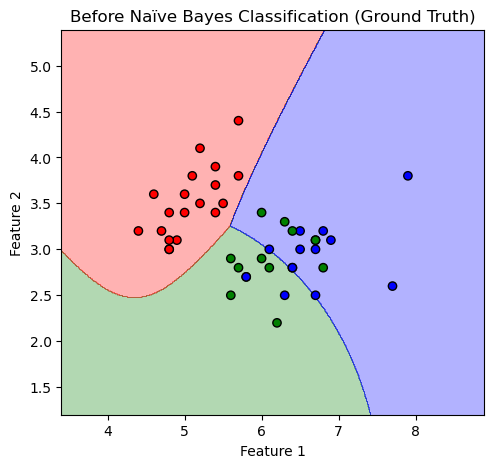

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_test, y_test, nb_classifier, "Before Naïve Bayes Classification (Ground Truth)")

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [36]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0,  7,  6],
       [ 0,  2, 11]], dtype=int64)

In [38]:
accuracy_score(y_test, y_pred)

0.8222222222222222

In [40]:
precision_score(y_test, y_pred, average='weighted')

0.833841684822077

In [42]:
recall_score(y_test, y_pred, average='weighted')

0.8222222222222222

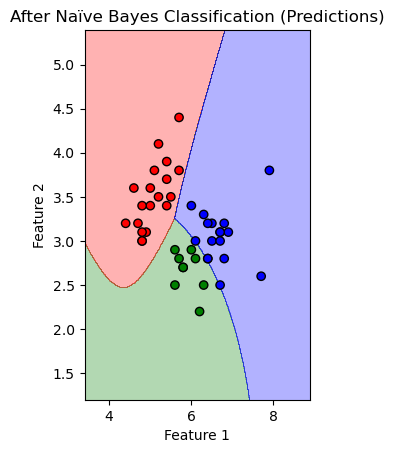

In [44]:
# Plot classification after Naïve Bayes
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_pred, nb_classifier, "After Naïve Bayes Classification (Predictions)")